<a href="https://colab.research.google.com/github/hernandezhdd/TrabajosMachineLearning/blob/master/TP2/ML_TP2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv'
r = requests.get(url, allow_redirects=True)
open('Covid19CasosBahia.csv', 'wb').write(r.content)
df_casos = pd.read_csv('Covid19CasosBahia.csv')
df_casos['fecha'] = pd.to_datetime(df_casos['fecha'])
df_casos.set_index('fecha', inplace=True)
# del df_casos['aprehendidos'] #Quito esta columna, es siempre cero
df_casos.tail()

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
fecha,,,,,,,,,,
2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0
2020-09-25,3012,1512,1434,66,3738,298,417,1168,625,0


<Figure size 432x288 with 0 Axes>

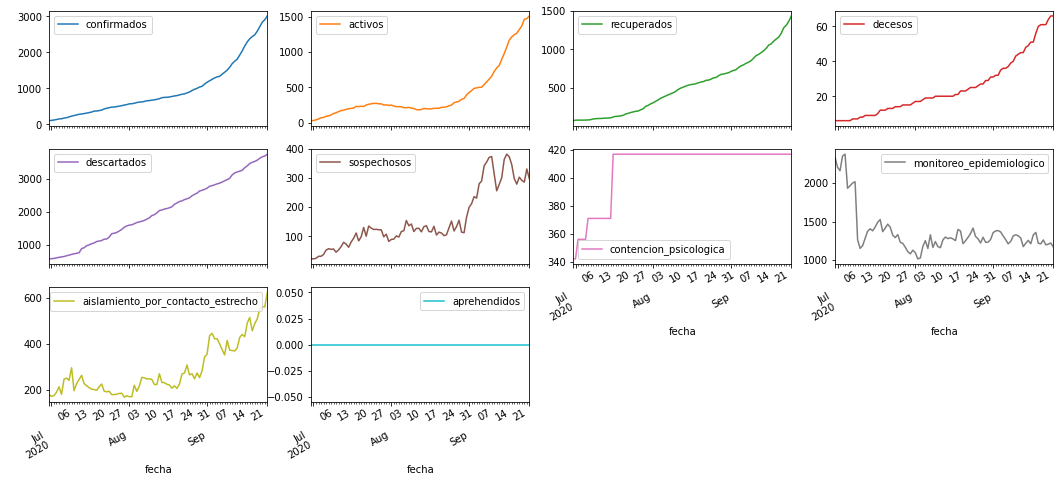

In [103]:
import matplotlib.pyplot as plt

plt.figure()
df_casos.plot(subplots=True, legend=True, figsize=(18,8), layout=(3, 4))
plt.show() #quéé cóómodo poder hacer tantos graficos con una linea, comparado con Matlab

Para que algo tenga una distribución normal, la variable debería estar
en un punto estacionario (que el promedio no cambie), osea que no tenga una tendencia, y que solo fluctúe alrededor de esa media. Además, las variables acumulativas no van a tener distribuciones normales. 

Entonces viendo los grááficos, activos podría tener una dist. normal en la parte media de la curva, sospechosos y aislamiento_por_contacto_estrecho al ppio., monitoreo_epidemiologico al final. 

La derivada de una variable acumulativa podría tener una dist. normal si la media se encuentra lejos de 0. La derivada de algo que no crece, o crece linealmente tambiéén podríía tener una dist. normal, por ej. aislamiento_por_contacto_estrecho. Sospechosos podría tener dos clases, una alrededor de 100 y una alrededor de 300. 

<Figure size 432x288 with 0 Axes>

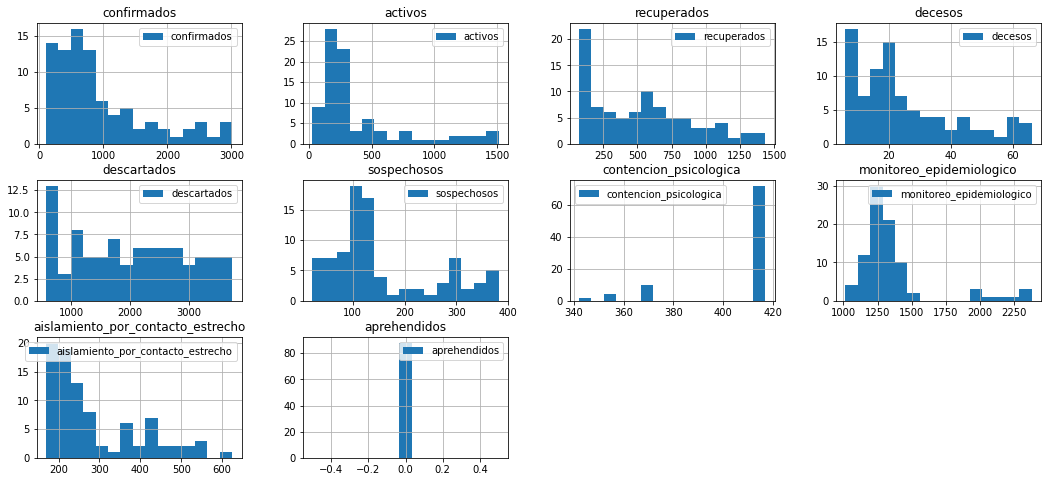

In [104]:
import matplotlib.pyplot as plt

plt.figure()
df_casos.hist(legend=True, figsize=(18,8), layout=(3, 4), bins=15)
plt.show()

Las conclusiones que saco (a ojo) son:

1.   Las variables acumulativas no van a tener distribuciones normales. 
2.   La variable 'aprehendidos' estaba siempre vacía. 
3. 'contencion_psicologica' se actualizó sólo un par de veces.
4. 'monitoreo_epidemiologico' parece tener dos clases, una que parece normal alrededor de 1250, y una constante en 2100. Igual la de 2100 solo son una decena de muestras.
5. Algo parecido a lo anterior pasa con varias variables.
6. Que 'descartados' sea mas o menos constante me hace pensar que la cantidad de 'descartados' creció linealmente en el tiempo (viendo el grááfico de máás arriba lo confirmo).



<Figure size 432x288 with 0 Axes>

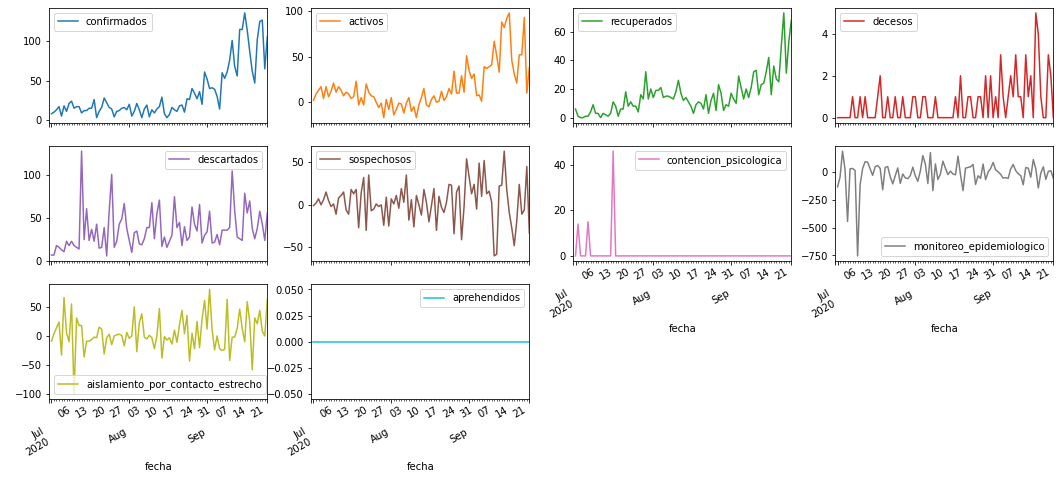

In [105]:
import matplotlib.pyplot as plt

df_casos_diff = df_casos.diff(axis=0) #Hago las derivadas

plt.figure()
df_casos_diff.plot(subplots=True, legend=True, figsize=(18,8), layout=(3, 4))
plt.show()

<Figure size 432x288 with 0 Axes>

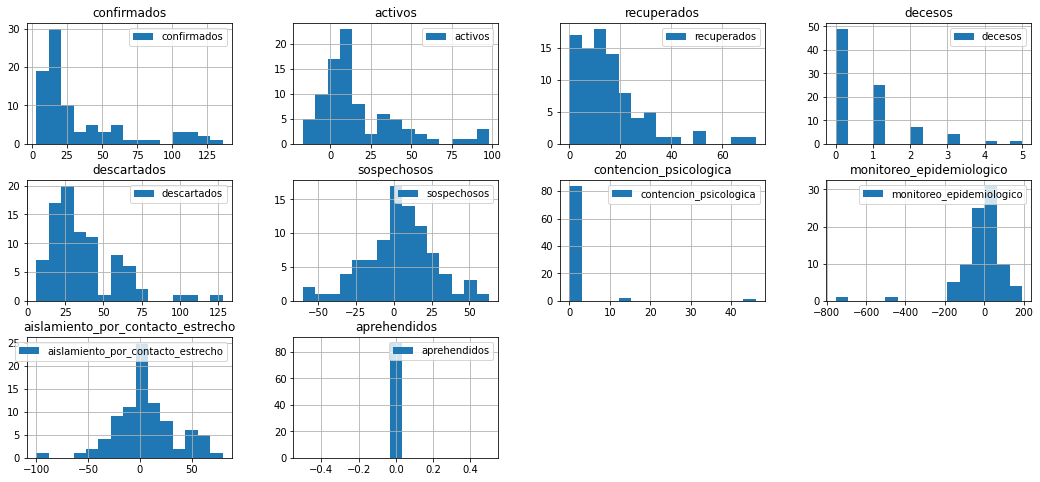

In [106]:
import matplotlib.pyplot as plt

plt.figure()
df_casos_diff.hist(legend=True, figsize=(18,8), layout=(3, 4), bins=15)
plt.show()

Las conclusiones que saco (a ojo) son:

1.   Las derivadas de sospechosos, monitoreo epidemilóógico y aislamiento_por_contacto_estrecho son máás o menos normales. 
2. La de confirmados y recuperados estáán demasiado cerca de 0, lo que podríía ser que las hace asiméétricas.
3. Como la epidemia tiene dos regíímenes bastante diferenciados, no tiene tanto sentido calcular los valores estadíísticos de las curvas enteras. O se puede tomar como dos clases diferenciadas las muestras de los regíímenes distintos.

In [129]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv'
r = requests.get(url, allow_redirects=True)
open('Covid19CamasBahia.csv', 'wb').write(r.content)
df_camas = pd.read_csv('Covid19CamasBahia.csv')

df_camas['fecha'] = pd.to_datetime(df_camas['fecha'])
df_camas.set_index('fecha', inplace=True)
del df_camas['observaciones'] #elimino esa columna porque si no despues no me deja derivar
# df_camas.index = -(df_camas.index-87)
df_camas.head()

,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
fecha,,,,,,,,,,,,,,,,,
2020-09-25,131,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4
2020-09-24,130,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4
2020-09-23,129,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4
2020-09-22,128,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4
2020-09-21,127,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4


El ííndice original estáá dado vuelta, no teníía sentido, los graficos mostraban que las camas ocupadas habian bajado a cero en el úúltimo dato.

<Figure size 432x288 with 0 Axes>

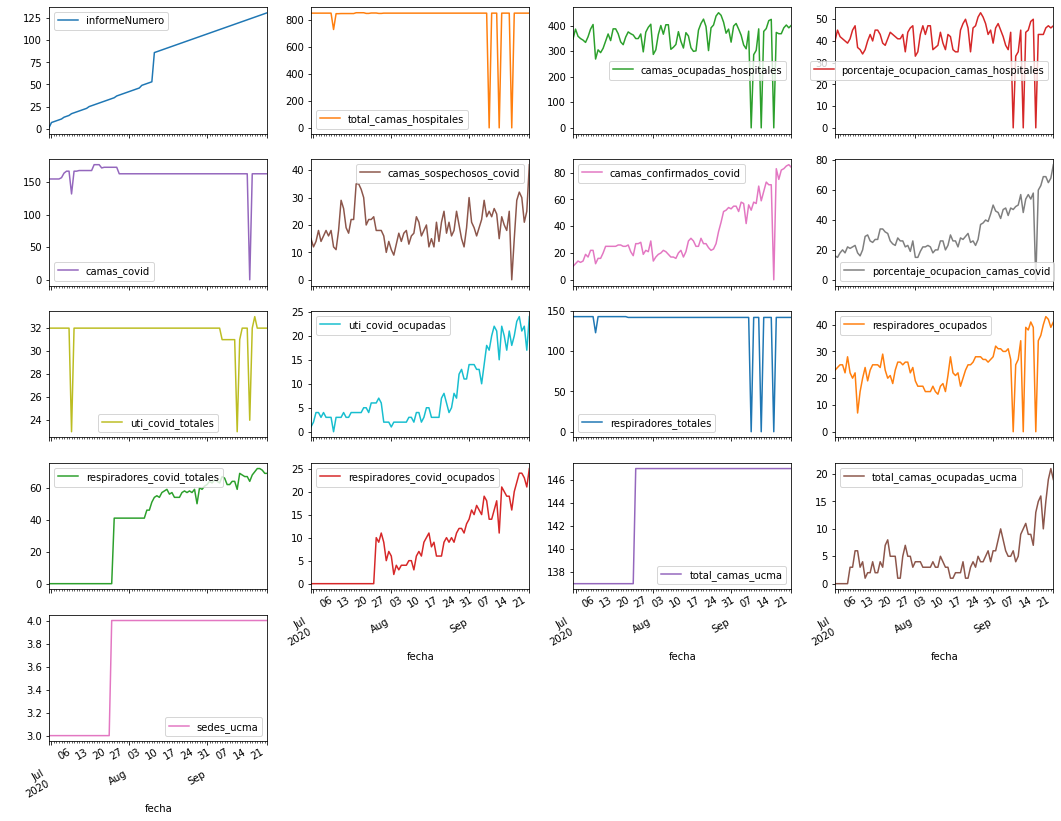

In [171]:
import matplotlib.pyplot as plt

plt.figure()
df_camas.plot(subplots=True, legend=True, figsize=(18,15), layout=(5, 4))
plt.show()

Sobre el final hay tres datos que falta o estan mal en varias series. 

Aca hay varias series que tienen media constante o crece linealmente (a ojo), asique podríían parecer dist. normales.

<Figure size 432x288 with 0 Axes>

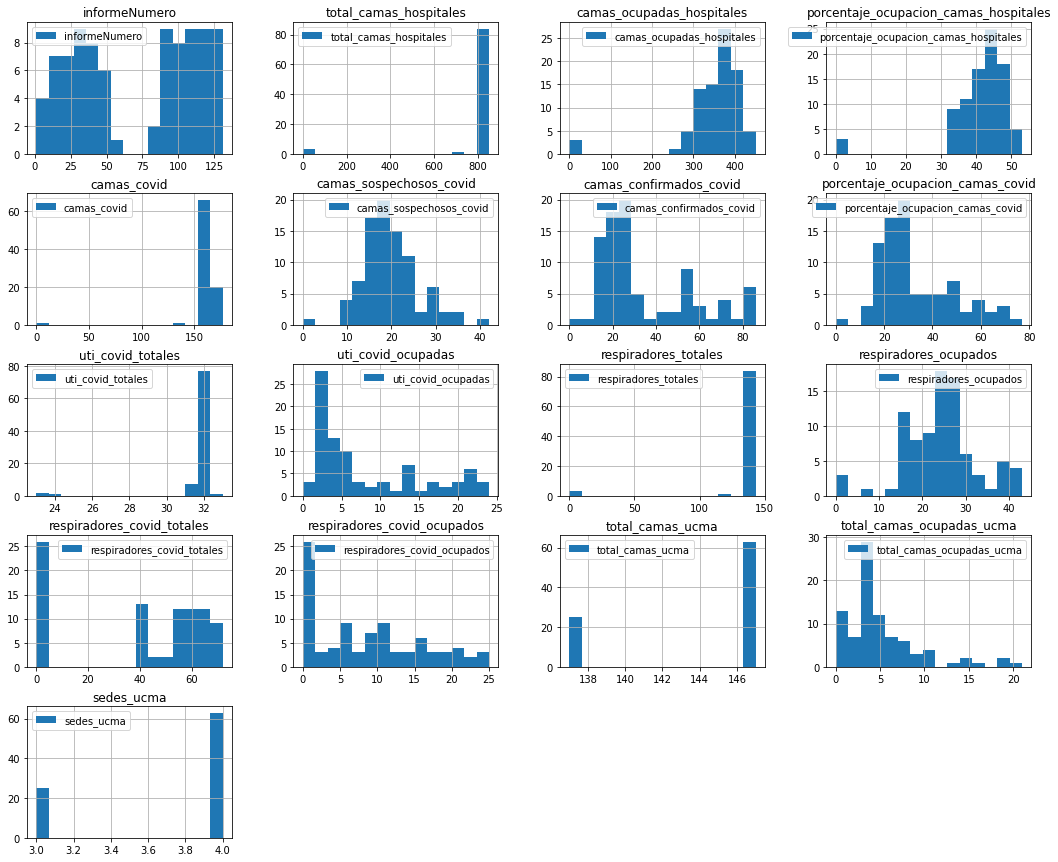

In [85]:
import matplotlib.pyplot as plt

plt.figure()
df_camas.hist(legend=True, figsize=(18,15), layout=(5, 4), bins=15)
plt.show()

Acáá lo que máás parecen normales son:

1.    camas_ocupadas_hospitales (como son 350, la tendencia de las camas ocupadas por covid no afecta mucho) 
2.   %_camas_ocupadas
3.   camas_sospechosos
4.   respiradores_ocupados



<Figure size 432x288 with 0 Axes>

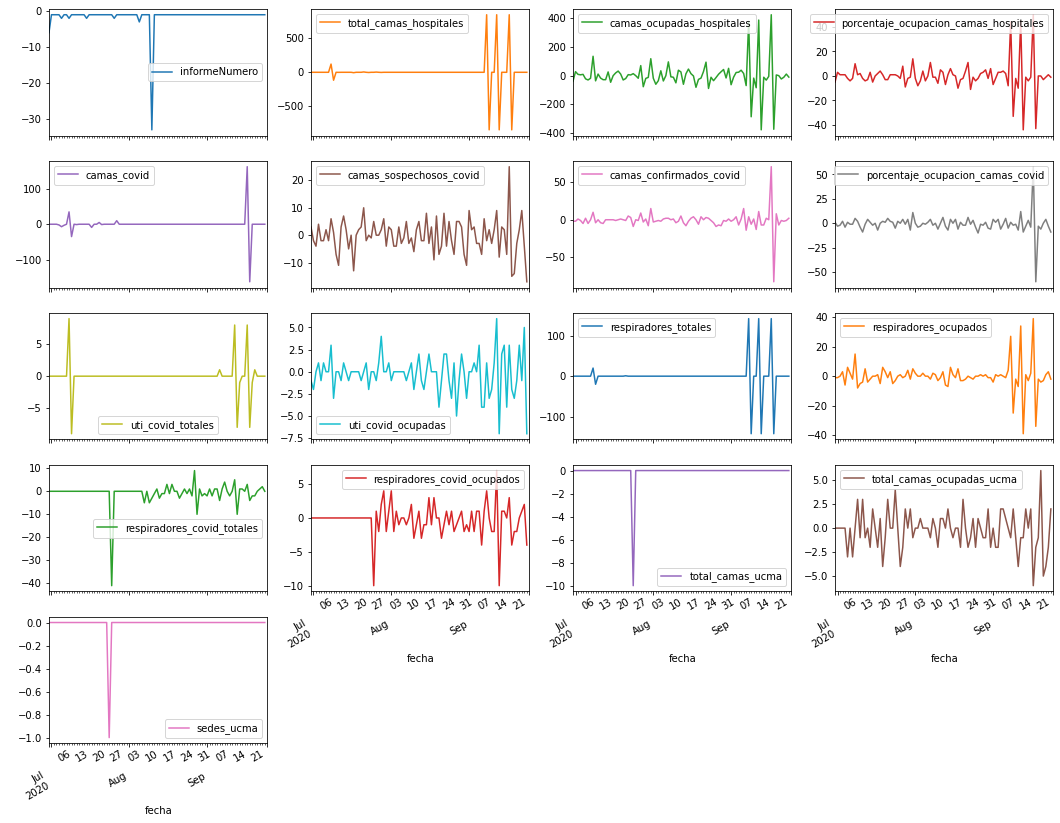

In [133]:
import matplotlib.pyplot as plt

df_camas_diff = df_camas.diff(axis=0) #Hago las derivadas
plt.figure()
df_camas_diff.plot(subplots=True, legend=True, figsize=(18,15), layout=(5, 4))
plt.show()

Acáá hay muchas que fluctúúan alrededor de un equilibrio, por lo que van a parecer máás o menos normales.

<Figure size 432x288 with 0 Axes>

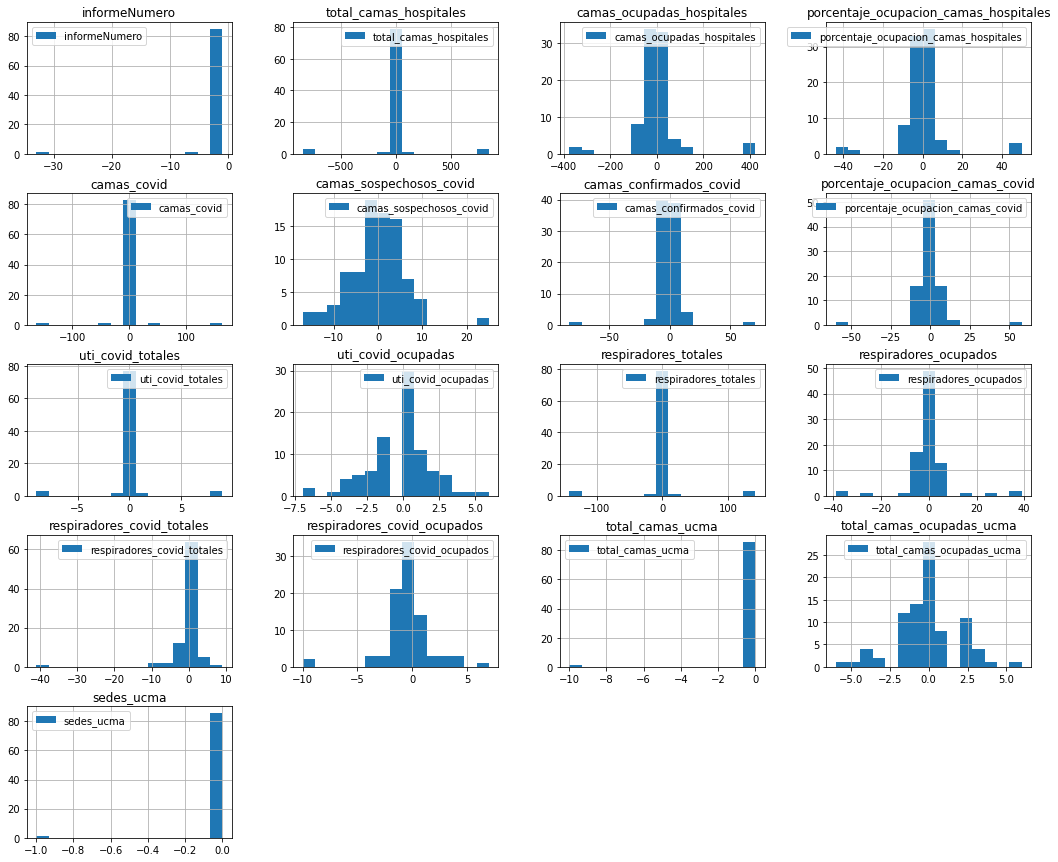

In [134]:
import matplotlib.pyplot as plt

plt.figure()
df_camas_diff.hist(legend=True, figsize=(18,15), layout=(5, 4), bins=15)
plt.show()

Conclusióón final: 

1.   Es importante graficar las series en funcióón del tiempo para no sacar conclusiones erróóneas de los histogramas, porque en los histogramas la serie se ve como si la situacióón fuera estáática, y casi todas estas series de tiempo tienen mas de un regimen.
2.   Pandas es muy cóómodo para graficar todo junto y pegarle una mirada por arriba al dataset.


